In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import Button, HBox
from IPython.display import display, clear_output

def disp_frame(video_path, video_index):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Frame counter
    frame_count = 0
    
    # Total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the buttons
    back3_button = Button(description="3 Frames Back")
    prev_button = Button(description="Previous Frame")
    next_button = Button(description="Next Frame")
    ahead3_button = Button(description="3 Frames Ahead")
    
    def show_frame():
        # Set the current frame to the frame we want to display
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count)
        
        # Read the frame from the video
        ret, frame = cap.read()
        
        if ret == True:
            # Convert color style from BGR to RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Display the frame
            clear_output(wait=True)
            plt.imshow(frame)
            plt.axis('off')  # Turn off the axis
            plt.show()
            print(f'Displaying Video {video_index}, Frame {frame_count} of {total_frames}')
            display(HBox([back3_button, prev_button, next_button, ahead3_button]))
        else:
            print(f'Cannot read frame {frame_count} of {total_frames} from video {video_index}.')
            cap.release()

    def on_back3_button_click(b):
        nonlocal frame_count
        frame_count = max(0, frame_count - 3)  # Do not go below 0
        show_frame()

    def on_prev_button_click(b):
        nonlocal frame_count
        frame_count = max(0, frame_count - 1)  # Do not go below 0
        show_frame()

    def on_next_button_click(b):
        nonlocal frame_count
        frame_count = min(total_frames - 1, frame_count + 1)  # Do not go beyond the total number of frames
        show_frame()

    def on_ahead3_button_click(b):
        nonlocal frame_count
        frame_count = min(total_frames - 1, frame_count + 3)  # Do not go beyond the total number of frames
        show_frame()
    
    back3_button.on_click(on_back3_button_click)
    prev_button.on_click(on_prev_button_click)
    next_button.on_click(on_next_button_click)
    ahead3_button.on_click(on_ahead3_button_click)
    
    # Display the button and start the function
    display(HBox([back3_button, prev_button, next_button, ahead3_button]))
    show_frame()

Now, we identify by eye which are the up and down frames.

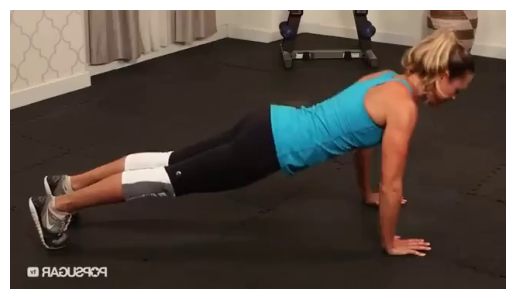

Displaying Video 10, Frame 0 of 157


In [5]:
# correct form videos
video_index = 10 # number we change, i.e. the video we want to look at!!!!

video_names = [1, 2, 3, 4, 5, 6, 7, 47, 78, 79, 80, 83, 85, 100, 101, 102, 113, 114, 115, 116, 127, 129, 131, 132, 133
                , 134, 135, 136, 137, 138, 140, 141, 142, 144, 146, 147, 148, 162, 163, 164, 165, 173, 174, 175, 176, 177, 178, 186, 187, 188, 197]
video_path_correct = f"datasets/data_corr_incorr/Correct sequence/Copy of push up {video_names[video_index]}.mp4"

disp_frame(video_path_correct, video_index)

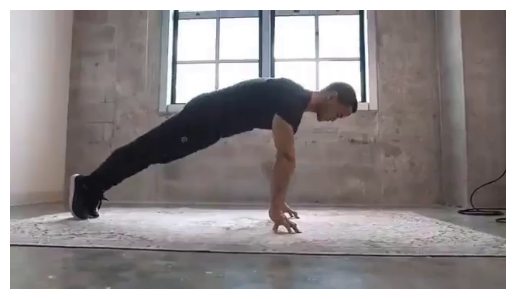

Displaying Video 24, Frame 0 of 66


In [6]:
# incorrect form videos
video_index = 24 # number we change, i.e. the video we want to look at!!!!
video_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Copy of push up 36', 'Copy of push up 37', 'Copy of push up 42','Copy of push up 44',
                'Copy of push up 46','Copy of push up 55','Copy of push up 56','Copy of push up 57','Copy of push up 58','Copy of push up 81','Copy of push up 104','Copy of push up 105',
                'Copy of push up 107', 'Copy of push up 108', 'Copy of push up 110', 'Copy of push up 149', 'Copy of push up 150', 'Copy of push up 151', 'Copy of push up 152', 'Copy of push up 153', 'Copy of push up 155', 'Copy of push up 156', 'Copy of push up 166', 'Copy of push up 167', 'Copy of push up 168', 'Copy of push up 171', 'Copy of push up 198']
video_path_incorrect = f"datasets/data_corr_incorr/Wrong sequence/{video_names[video_index]}.mp4"


disp_frame(video_path_incorrect, video_index)

Agora é tomar nota da UP e DOWN frame (apenas uma de cada) para cada vídeo. Depois recriamos os novos datasets, o taylored_correct e o taylored_incorrect (com os labels corretos e incorretos, respetivamente).